<center><h1><span style="color: green;">THỰC HÀNH BUỔI 3</span></h1></center>

# <span style="color: gray;">A. PHƯƠNG PHÁP K-NN CHO PHÂN LOẠI NHỊ PHÂN (K-NN BINARY CLASSIFIER)</span>

## Ví dụ A.1

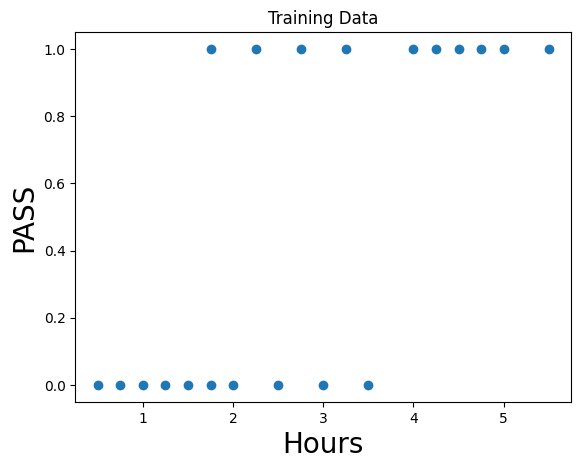

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Vẽ dữ liệu training
plt.scatter(X, y)
plt.xlabel('Hours', fontsize=20)
plt.ylabel('PASS', fontsize=20)
plt.title('Training Data')
plt.show()

Predict with k = 1
X_test[1] = 2.45  ->  Y_pred: 0.0
X_test[2] = 1.85  ->  Y_pred: 1.0
X_test[3] = 3.75  ->  Y_pred: 0.0
X_test[4] = 3.21  ->  Y_pred: 1.0
X_test[5] = 4.05  ->  Y_pred: 1.0
---------------------------------
Predict with k = 2
X_test[1] = 2.45  ->  Y_pred: 1.0
X_test[2] = 1.85  ->  Y_pred: 1.0
X_test[3] = 3.75  ->  Y_pred: 1.0
X_test[4] = 3.21  ->  Y_pred: 1.0
X_test[5] = 4.05  ->  Y_pred: 1.0
---------------------------------
Predict with k = 3
X_test[1] = 2.45  ->  Y_pred: 1.0
X_test[2] = 1.85  ->  Y_pred: 0.0
X_test[3] = 3.75  ->  Y_pred: 1.0
X_test[4] = 3.21  ->  Y_pred: 0.0
X_test[5] = 4.05  ->  Y_pred: 1.0
---------------------------------


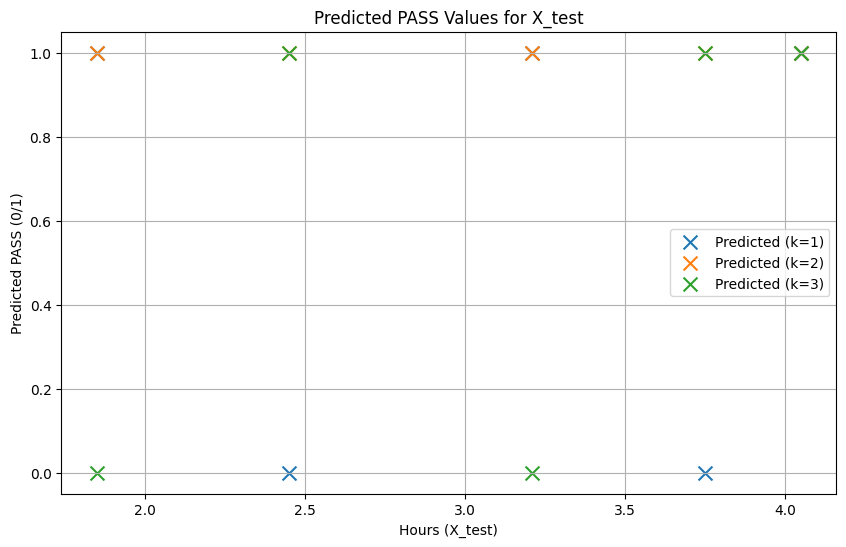

In [165]:
# Hàm tính khoảng cách
def distance(array, value):
    array = np.array(array)
    return abs(array - value)

# Hàm tìm k chỉ số gần nhất
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

# Chuẩn bị dữ liệu
X_train = X.flatten()  # Ép thành 1D: (20,)
Y_train = y  # (20,)
X_test = np.array([2.45, 1.85, 3.75, 3.21, 4.05])  # 1D: (5,)

# Hàm dự đoán
def predict_A1(X_test, X_train, Y_train, k):
    print(f'Predict with k = {k}')
    Y_pred = np.zeros(X_test.size)
    
    for i in range(X_test.size):
        indexis = find_nearest_index(X_train, X_test[i], k)
        Y_pred[i] = np.mean(Y_train[indexis])  # Trung bình của k điểm gần nhất
        Y_pred[i] = 1 if Y_pred[i] >= 0.5 else 0  # Phân loại nhị phân
        print(f"X_test[{i+1}] = {X_test[i]}  ->  Y_pred: {Y_pred[i]}")
    
    print('---------------------------------')
    return Y_pred

# Chạy với các giá trị k
k_values = [1, 2, 3]
results = {}
Y_pred_3k = []
for k in k_values:
    Y_pred = predict_A1(X_test, X_train, Y_train, k)
    if k == 3:
        Y_pred_3k = Y_pred  # Lưu lại kết quả cho k=3
    results[k] = {'Y_pred': Y_pred}

# Trực quan hóa
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.scatter(X_test, results[k]['Y_pred'], label=f'Predicted (k={k})', marker='x', s=100)
plt.xlabel('Hours (X_test)')
plt.ylabel('Predicted PASS (0/1)')
plt.title('Predicted PASS Values for X_test')
plt.legend()
plt.grid(True)
plt.show()

## Ví dụ A.2


In [166]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

file_path = '../Lab2/vidu4_lin_reg.txt'
data = pd.read_csv(file_path, sep=' ', header=0)
print(data.head())

   ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0   1    56   21  160     14.0         6.00      1.95
1   2    76   18  150     12.0         4.97      1.33
2   3    63   16  160      4.4         6.39      0.83
3   4    78   20  100      4.0         7.00      2.00
4   5    87   20  110      4.6         4.10      1.30


In [167]:
# Tách features và target
X = data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']]
y = data['BEDAYNTM']

# Biến đổi nhãn trong y: >= 1 thành 1, < 1 thành 0
y = np.where(y >= 1, 1, 0)

# Chia dữ liệu: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Khởi tạo và huấn luyện mô hình K-NN (thử với k=5, có thể điều chỉnh)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_knn = knn.predict(X_val)

# In kết quả dự đoán
print("\nK-NN Predictions on Validation Set:")
print("Predicted labels:", y_pred_knn)
print("Actual labels:", y_val)

# Đánh giá mô hình K-NN
print("\nK-NN Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Precision:", precision_score(y_val, y_pred_knn))
print("Recall:", recall_score(y_val, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))


Training set shape: (80, 5)
Validation set shape: (20, 5)

K-NN Predictions on Validation Set:
Predicted labels: [0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0]
Actual labels: [1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]

K-NN Evaluation Metrics:
Accuracy: 0.7
Precision: 0.7142857142857143
Recall: 0.5555555555555556
Confusion Matrix:
 [[9 2]
 [4 5]]


# <span style="color: gray;">B. PHƯƠNG PHÁP HỒI QUY LOGISTIC</span>

## Ví dụ B.1

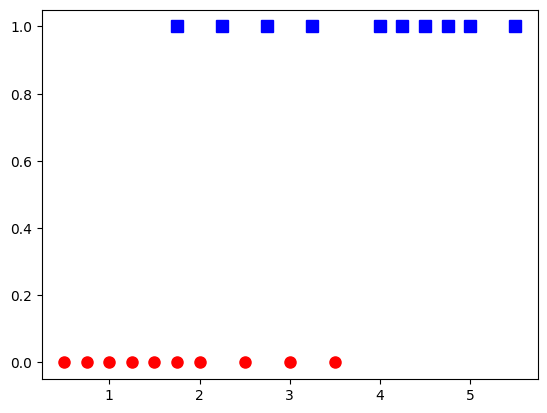

In [168]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [169]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
# loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

print("Kết quả (bộ hệ số w)")
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])
print("Xác suất rơi vào lớp 1 (qua) của các phần tử dữ liệu trong tập training: ")
print(sigmoid(np.dot(w[-1].T, X)))

Kết quả (bộ hệ số w)
[[-4.092695  ]
 [ 1.55277242]]
Xác suất rơi vào lớp 1 (qua) của các phần tử dữ liệu trong tập training: 
[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


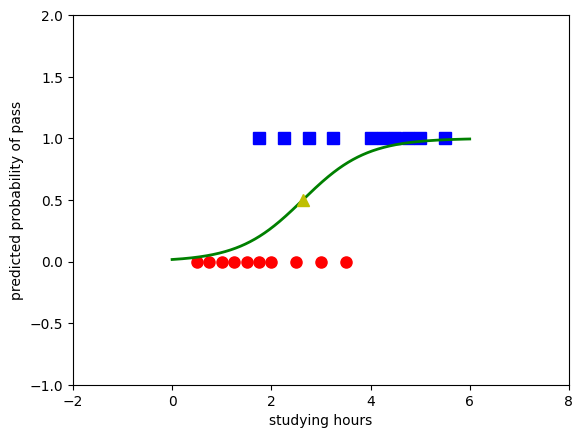

In [170]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [171]:
# Dữ liệu test
X_test_ori = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
X_test = np.concatenate((np.ones((1, X_test_ori.shape[0])), X_test.reshape(1, -1)), axis=0)

# Thực hiện hồi quy logistic
w = logistic_sigmoid_regression(X, y, w_init, eta)

# Dự đoán xác suất với hồi quy logistic
pred_probabilities_logistic = sigmoid(np.dot(w[-1].T, X_test))

# Chuyển xác suất thành nhãn (1 nếu xác suất >= 0.5, 0 nếu < 0.5)
pred_labels_logistic = (pred_probabilities_logistic >= 0.5).astype(int)

# In kết quả
print("Dự đoán với hồi quy logistic (xác suất qua môn):")
print(pred_labels_logistic[0])

# So sánh kết quả giữa Logistic Regression và K-NN
print("\nSo sánh kết quả:")
print(f"X_test = {X_test_ori}:")
print(f"-> Hồi quy Logistic - Nhãn dự đoán: {pred_labels_logistic[0]}")
print(f"-> K-NN (k=3)       - Nhãn dự đoán: {np.array(list(map(int, Y_pred_3k)))}")

Dự đoán với hồi quy logistic (xác suất qua môn):
[0 0 1 1 1]

So sánh kết quả:
X_test = [2.45 1.85 3.75 3.21 4.05]:
-> Hồi quy Logistic - Nhãn dự đoán: [0 0 1 1 1]
-> K-NN (k=3)       - Nhãn dự đoán: [1 0 1 0 1]


## Ví dụ B.2

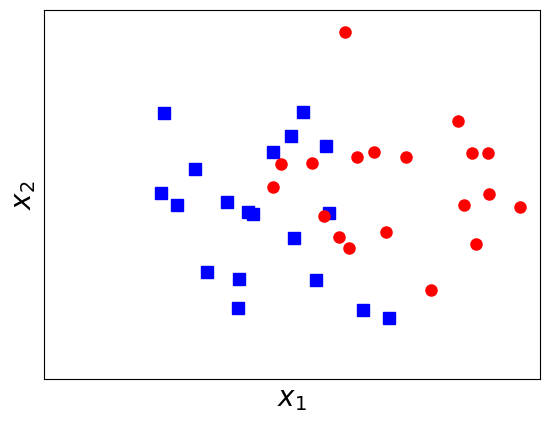

In [172]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20

X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()


In [173]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
# loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init

# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])


[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


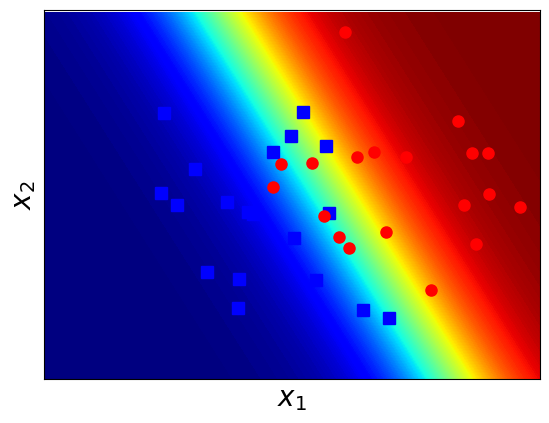

In [174]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()


## Ví dụ B.3 (Bài tập 1)

In [175]:
# importing module
import numpy as np
from pandas import *
# reading CSV file
data = read_csv("Admission_Predict.csv")
# converting column data to list, then convert list to array

sn = data['Serial No.'].tolist()
gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)
tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)
unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)
sop = data['SOP'].tolist()
X4 = np.asarray(sop)
lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)
cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)
research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)
prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)
# printing list data
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


### (a) Phân loại bằng phương pháp hồi quy Logistic

In [176]:
# Sigmoid function for logistic regression
def sigmoid(s):
    s = np.clip(s, -500, 500)  # Giới hạn giá trị s để tránh overflow
    return 1 / (1 + np.exp(-s))

# Logistic regression using Stochastic Gradient Descent
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    
    # Loop of stochastic gradient descent
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w


In [177]:
# Hợp nhất các đặc trưng vào X
X = np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis], X3[:, np.newaxis], X4[:, np.newaxis], X5[:, np.newaxis], X6[:, np.newaxis], X7[:, np.newaxis]), axis = 1)

# Thêm cột xếp 1 vào X (thêm bias term)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

# Chuyển vị
X = X.T

# Kiểm tra lại kích thước của X
print(X.shape)


(8, 400)


In [178]:
# Chia tập train (350 mẫu) và tập test (50 mẫu)
X_train = X[:, :350].T  # Chọn 350 mẫu đầu tiên để train
Y_train = Yt[:350]    # Chọn 350 nhãn đầu tiên để train

X_test = X[:, 350:].T   # Chọn 50 mẫu còn lại để test
Y_test = Yt[350:]     # Chọn 50 nhãn còn lại để test

# Thiết lập tham số ban đầu
eta = 0.05
d = X_train.shape[1]  # Số lượng đặc trưng sau khi thêm bias
w_init = np.random.randn(d, 1)  # Khởi tạo tham số

# Gọi hàm logistic regression để huấn luyện trên tập train
w = logistic_sigmoid_regression(X_train.T, Y_train, w_init, eta, tol=1e-4, max_count=10000)

# In ra vector tham số cuối cùng
print("Trọng số cuối cùng:", w[-1])

Trọng số cuối cùng: [[ -1.02252197]
 [-26.71577859]
 [ 64.82591648]
 [ 38.1589134 ]
 [ 31.45722154]
 [ 29.34253271]
 [ 12.48538685]
 [ 14.69894602]]


Accuracy: 0.56
Precision: 1.0
Recall: 0.0


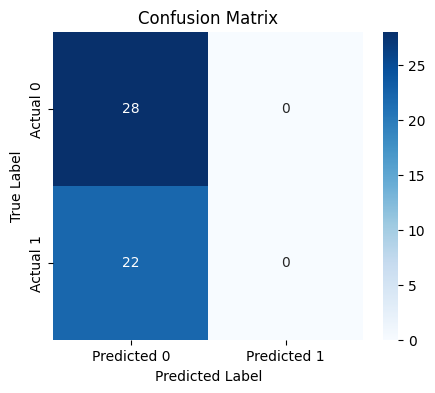

In [179]:
# Dự đoán trên tập test
predictions = sigmoid(np.dot(X_test, w[-1])) >= 0.75  # Ngưỡng 0.75 để phân loại class 1

# Chuyển Y_test thành nhị phân theo ngưỡng 0.75
Y_test_binary = (Y_test >= 0.75).astype(int)

# Tính Accuracy, Precision, Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(Y_test_binary, predictions)
precision = precision_score(Y_test_binary, predictions, zero_division=1)
recall = recall_score(Y_test_binary, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(Y_test_binary, predictions)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### (b) Bài tập thực hành: Dự đoán khả năng bằng hồi quy tuyến tính


In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, Y_train)

# Dự đoán tỷ lệ trúng tuyển cho tập test
Y_pred = model.predict(X_test)

# Tính toán MSE và R^2
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# In kết quả
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.004641678440367142
R-squared (R²): 0.8136557619619793


## Ví dụ B.6 (Bài tập 3).

In [192]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

df = pd.read_csv("framingham.csv")
df.head()
df.isnull().sum()
df=df.dropna(how="any", axis=0)

In [193]:
X = df.drop(columns=['TenYearCHD'])  
y = df['TenYearCHD']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập dữ liệu thành Training (70%) và Validation (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Logistic Regression 
model = LogisticRegression(solver='liblinear', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# In kết quả
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.8469
Recall: 0.0977
Precision: 0.6071
